In [1]:
import pandas as pd
import numpy as np

import nltk

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')
from PIL import Image
    
from pyScript import create_wordcloud

In [2]:
data_20 = pd.read_csv('data_20_completed.csv')
data_20.head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True


In [3]:
data_19 = pd.read_csv('data_19_completed.csv')
data_19.head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,0,1108780905903149061,/jimmyfallon/status/1108780905903149061,2019-03-21 17:22:22,What a team you’ve got? Loved them. Crush it o...,[],False,[],1413,112,35,True,False


---

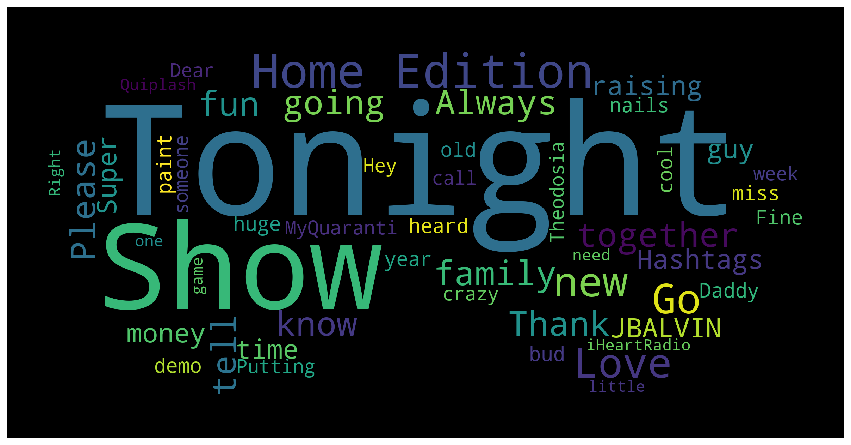

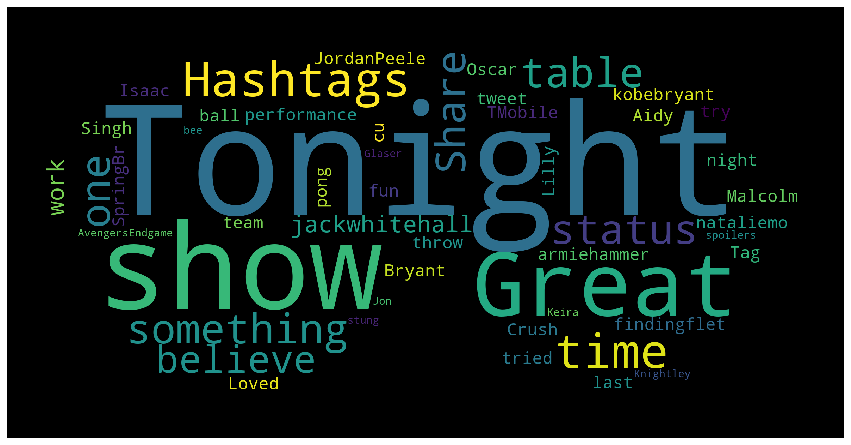

In [7]:
_stop_words = ['com', 'ha', 'AJ', 'nPing', 'end', 'gla', 'Na', 'https', 'scr', 'twitter', 'get', 'got', 'put', 'we\'ve']

_mask_image = np.array(Image.open('mask.png'))

create_wordcloud(data_20['text'], mask=_mask_image, stop_words=_stop_words)
create_wordcloud(data_19['text'], mask=_mask_image, stop_words=_stop_words)